# Get Twitter stream data

In [ ]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [ ]:
#import tweepy
consumer_key = 'lV1bE6trpX27gFBwZtyXPQwjL'
consumer_secret = 'qpPfjoQSXsPqmL4B5RL3gNmYrMKNkjw2XndqhJ9oFn9nDMwMvi'
access_token = '4050068361-4jbKCPlpYWtTRQoloLGbT94hQ56NLaiMsZlgDGv'
access_token_secret = 'HvOegcghWxWel59LRu0fS6KvlffSDBSg16NFDobXAADt7'

In [ ]:
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
print('Name: ' + user.name)
print('Friends: ' + str(user.friends_count))

# Reading and Understanding the data

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [4]:
print (len(tweets_data))

84


In [5]:
tweets = pd.DataFrame()

In [6]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

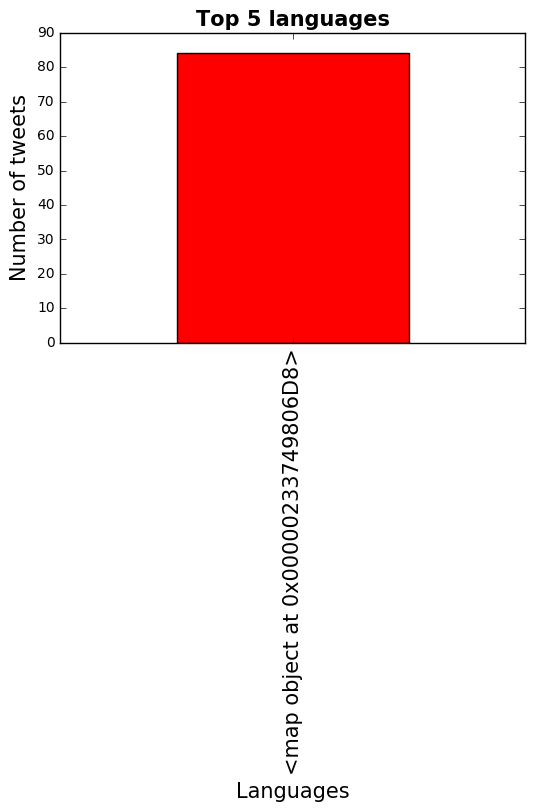

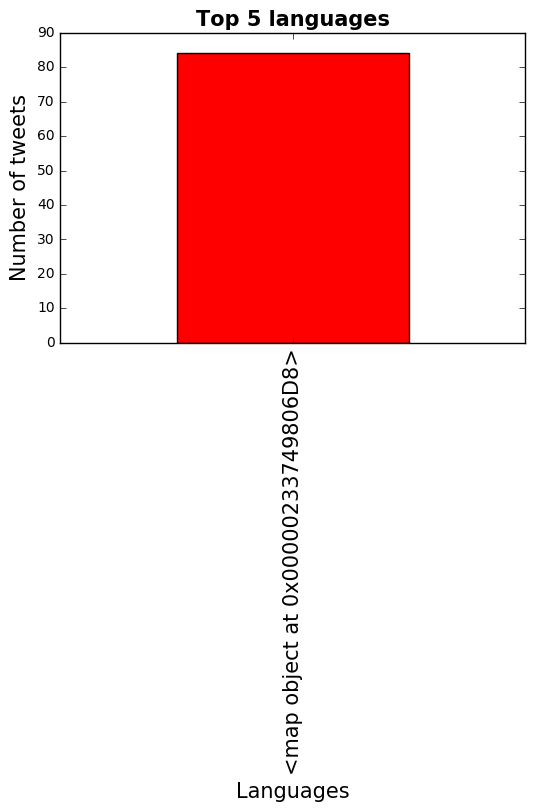

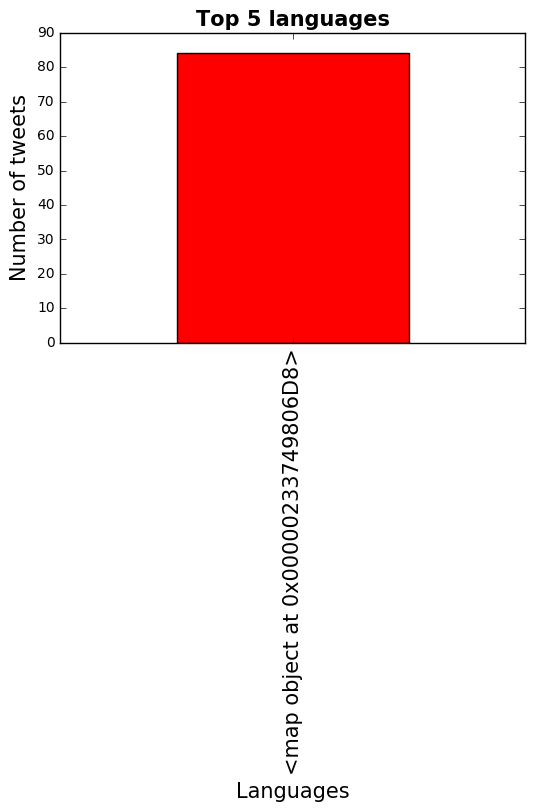

In [9]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
plt.show()

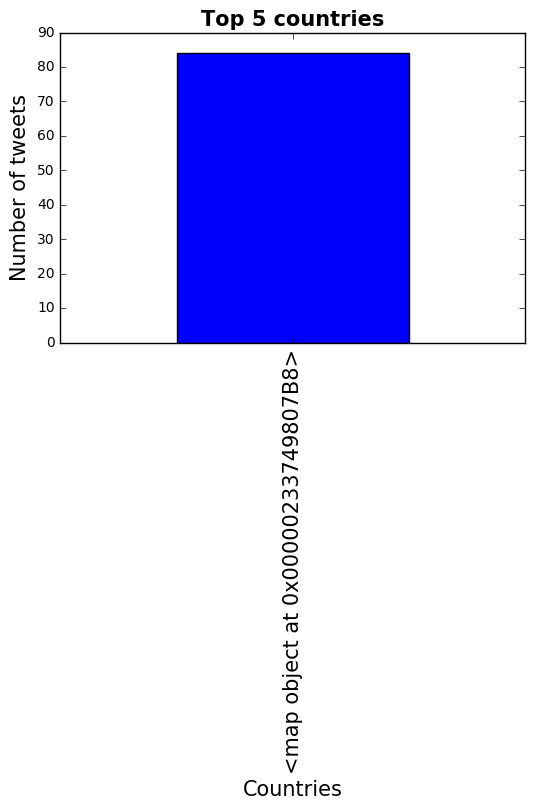

In [10]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
plt.show()

# Save text files to json files

In [2]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
consumer_key = 'lV1bE6trpX27gFBwZtyXPQwjL'
consumer_secret = 'qpPfjoQSXsPqmL4B5RL3gNmYrMKNkjw2XndqhJ9oFn9nDMwMvi'
access_token = '4050068361-4jbKCPlpYWtTRQoloLGbT94hQ56NLaiMsZlgDGv'
access_token_secret = 'HvOegcghWxWel59LRu0fS6KvlffSDBSg16NFDobXAADt7'

In [3]:
class StdOutListener(StreamListener):

    def on_data(self, data):
        print (data)
        return True

    def on_error(self, status):
        print (status)

if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    #stream.filter(track=['python', 'javascript', 'ruby'])
    stream.sample()

KeyboardInterrupt: 